In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#X is feature vectors
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# y is labels
Y = df[['Outcome']]

In [4]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)


In [5]:
features =X.T  # X 데이터는 150 × 4 이라면,
               # feature 는 4 × 150 이다.

covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.13540563e+01  1.39471307e+01  9.21453818e+00 -4.39004101e+00
  -2.85552307e+01  4.69774181e-01 -3.74259714e-02  2.15706198e+01]
 [ 1.39471307e+01  1.02224831e+03  9.44309556e+01  2.92391827e+01
   1.22093580e+03  5.57269867e+01  1.45487481e+00  9.90828054e+01]
 [ 9.21453818e+00  9.44309556e+01  3.74647271e+02  6.40293962e+01
   1.98378412e+02  4.30046951e+01  2.64637574e-01  5.45234528e+01]
 [-4.39004101e+00  2.92391827e+01  6.40293962e+01  2.54473245e+02
   8.02979941e+02  4.93738694e+01  9.72135546e-01 -2.13810232e+01]
 [-2.85552307e+01  1.22093580e+03  1.98378412e+02  8.02979941e+02
   1.32811801e+04  1.79775172e+02  7.06668051e+00 -5.71432903e+01]
 [ 4.69774181e-01  5.57269867e+01  4.30046951e+01  4.93738694e+01
   1.79775172e+02  6.21599840e+01  3.67404687e-01  3.36032992e+00]
 [-3.74259714e-02  1.45487481e+00  2.64637574e-01  9.72135546e-01
   7.06668051e+00  3.67404687e-01  1.09778638e-01  1.30771687e-01]
 [ 2.15706198e+01  9.90828054e+01  5.45234528e+01 -2.13810232e+01
  -

In [6]:
values, vectors = np.linalg.eig(covariance_matrix)

print('\nEigenvalues \n%s '% values[:])
print('\nEigenvectros \n%s'  %  vectors[:])



Eigenvalues 
[1.34565730e+04 9.32760132e+02 3.90577831e+02 1.98182691e+02
 1.12689115e+02 4.58294431e+01 7.76070899e+00 1.02871018e-01] 

Eigenvectros 
[[-2.02176587e-03  2.26488861e-02 -2.24649003e-02 -4.90459604e-02
   1.51612874e-01  5.04730888e-03 -9.86672995e-01 -6.10123250e-03]
 [ 9.78115765e-02  9.72210040e-01  1.43428710e-01  1.19830016e-01
  -8.79407680e-02 -5.07391813e-02 -8.83426114e-04  8.25459539e-04]
 [ 1.60930503e-02  1.41909330e-01 -9.22467192e-01 -2.62742788e-01
  -2.32165009e-01 -7.56365525e-02  1.22975947e-03 -5.20865450e-04]
 [ 6.07566861e-02 -5.78614699e-02 -3.07013055e-01  8.84369380e-01
   2.59973487e-01 -2.21363068e-01  3.76444746e-04  2.54871909e-03]
 [ 9.93110844e-01 -9.46266913e-02  2.09773019e-02 -6.55503615e-02
  -1.72312241e-04  6.13326472e-03 -1.42307394e-03  2.68965921e-04]
 [ 1.40108085e-02  4.69729766e-02 -1.32444542e-01  1.92801728e-01
   2.14744823e-02  9.70776708e-01  2.73046214e-03  2.67341863e-03]
 [ 5.37167919e-04  8.16804621e-04 -6.39983017e-04

In [7]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
print(np.sum(explained_variances), '\n', explained_variances)


1.0 
 [0.8885466345756242, 0.061590783745876426, 0.02579011891766146, 0.013086137415140739, 0.007440938639887548, 0.0030261491882255715, 0.000512444874569854, 6.792643014072569e-06]


In [8]:
projected_x = X.dot(vectors.T[0])
projected_y = X.dot(vectors.T[1])

In [9]:
result = pd.DataFrame(projected_x, columns =['PC1'])
result['PC2'] = projected_y
result['y-axis']=0.0
result['label'] = Y 

In [10]:
result.head()

,PC1,PC2,y-axis,label
0,18.042029,160.802513,0.0,1
1,11.398416,95.943517,0.0,0
2,19.126041,192.758227,0.0,1
3,104.834107,89.953244,0.0,0
4,183.500472,127.598667,0.0,1


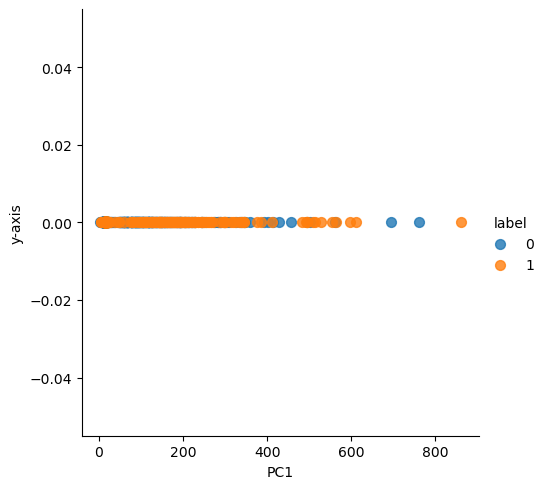

In [11]:
sns.lmplot(x='PC1', y='y-axis', data=result, 
           fit_reg=False,                       # no line
           scatter_kws={"s":50},                # marker size
           hue="label")                         # color


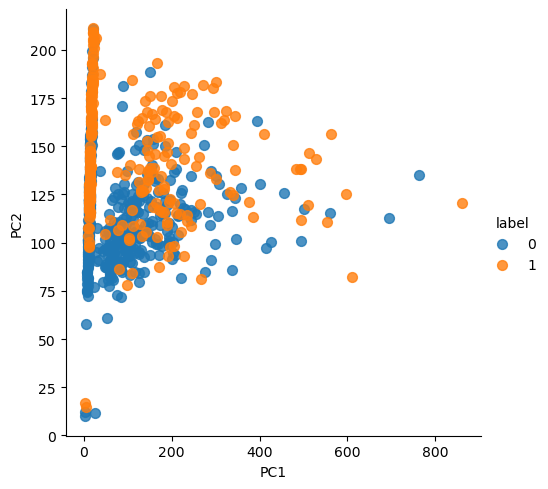

In [12]:
sns.lmplot(x='PC1', y='PC2', data=result, 
           fit_reg=False,  # no line
           scatter_kws={"s":50},  # marker size
           hue="label")  # color


###  Logistic Regression and SVM Classification

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv("/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/1주차/diabetes.csv")

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

svm = SVC()
svm.fit(X_train, y_train.values.ravel())

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')


Logistic Regression Accuracy: 0.7077922077922078
SVM Accuracy: 0.7207792207792207
